In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('NBA_Player_Stats.csv');
print(df.head())
print(df.isnull().sum())
print(df.columns)

   Rk               Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  ORB  \
0   1   Mahmoud Abdul-Rauf  PG   28  SAC  31   0  17.1  3.3   8.8  ...  0.2   
1   2    Tariq Abdul-Wahad  SG   23  SAC  59  16  16.3  2.4   6.1  ...  0.7   
2   3  Shareef Abdur-Rahim  SF   21  VAN  82  82  36.0  8.0  16.4  ...  2.8   
3   4       Cory Alexander  PG   24  TOT  60  22  21.6  2.9   6.7  ...  0.3   
4   4       Cory Alexander  PG   24  SAS  37   3  13.5  1.6   3.9  ...  0.2   

   DRB  TRB  AST  STL  BLK  TOV   PF   PTS       Year  
0  1.0  1.2  1.9  0.5  0.0  0.6  1.0   7.3  1997-1998  
1  1.2  2.0  0.9  0.6  0.2  1.1  1.4   6.4  1997-1998  
2  4.3  7.1  2.6  1.1  0.9  3.1  2.5  22.3  1997-1998  
3  2.2  2.4  3.5  1.2  0.2  1.9  1.6   8.1  1997-1998  
4  1.1  1.3  1.9  0.7  0.1  1.3  1.4   4.5  1997-1998  

[5 rows x 31 columns]
Rk           0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%         88
3

In [ ]:
print(df.size)
print(df.shape)
df = df.dropna()
print(df.isnull().sum())

370822
(11962, 31)
Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Year      0
dtype: int64


At this point I have already drop the null values of the dataframe and let's inspect together the meaning of columns. We have games and games where each player scored, the minutes they were on court along with the field shots tried and scored. Moreover, we can find the position and team they were part of and also the percentage of the 2-pointers and 3-pointers they have scored. Lastly, we can figure out how many rebounds(offensive and defensive) they had taken and information about their performance in steals, blocks, assists and turnovers.
At this stage, I am going to plot some diagramms referring to the histograms of age, successfull 3p and 2p and turnovers. Also, I would answer some questions that may occur to a fan of basketball.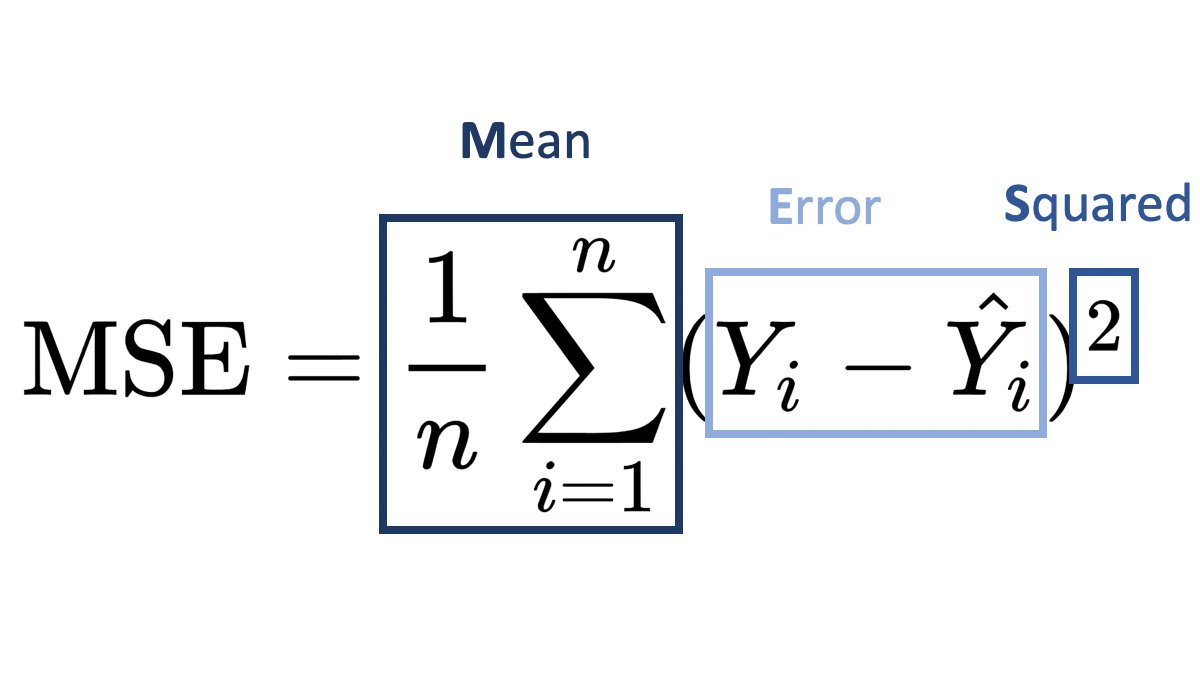

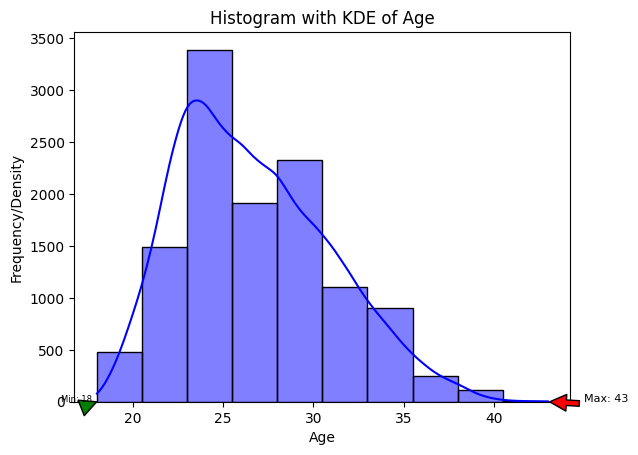

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Plotting the histogram with KDE
sns.histplot(df['Age'], bins=10, kde=True, color='blue', edgecolor='black')
plt.title('Histogram with KDE of Age')
plt.xlabel('Age')
plt.ylabel('Frequency/Density')

# Annotate max and min values
max_age = df['Age'].max()
min_age = df['Age'].min()

plt.annotate(f'Max: {max_age}', xy=(max_age, 0), xytext=(max_age + 2, 0.02),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=8)

plt.annotate(f'Min: {min_age}', xy=(min_age, 0), xytext=(min_age - 2, 0.02),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=6)

plt.show()


Text(0, 0.5, 'Frequency/Density')

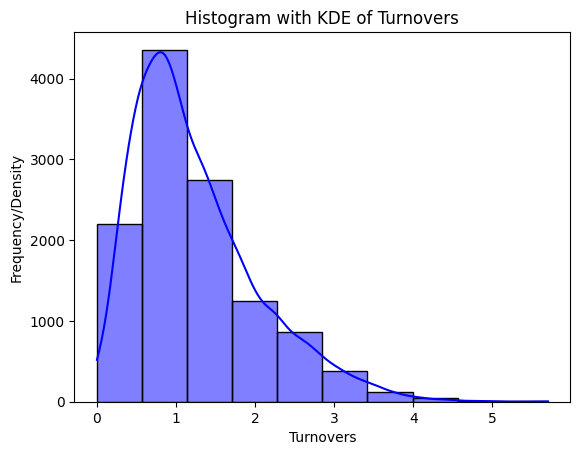

In [ ]:
# Plotting the histogram with KDE
sns.histplot(df['TOV'], bins=10, kde=True, color='blue', edgecolor='black')
plt.title('Histogram with KDE of Turnovers')
plt.xlabel('Turnovers')
plt.ylabel('Frequency/Density')

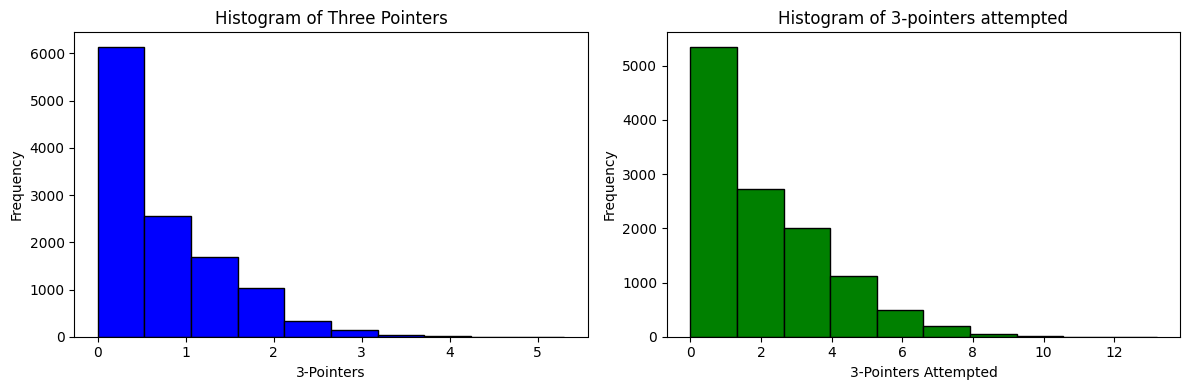

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plotting histograms for Column1
axes[0].hist(df['3P'], bins=10, color='blue', edgecolor='black')
axes[0].set_title('Histogram of Three Pointers')
axes[0].set_xlabel('3-Pointers')
axes[0].set_ylabel('Frequency')

# Plotting histograms for Column2
axes[1].hist(df['3PA'], bins=10, color='green', edgecolor='black')
axes[1].set_title('Histogram of 3-pointers attempted')
axes[1].set_xlabel('3-Pointers Attempted')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


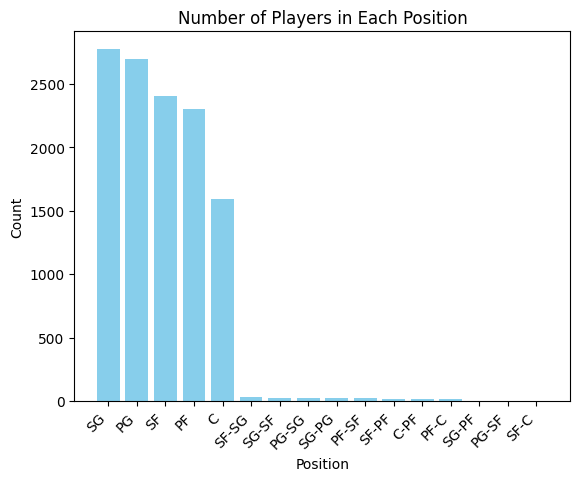

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Count the occurrences of each position
position_counts = df['Pos'].value_counts()

# Plotting the bar plot with rotated y-labels
plt.bar(position_counts.index, position_counts.values, color='skyblue')
plt.title('Number of Players in Each Position')
plt.xlabel('Position')
plt.ylabel('Count')

# Rotate y-labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()



Up until now we can see that most of the players are shooting and point guards and, as expected, those who can play in multiple positions are the minority of our dataset. Age is varying from young stars(18) to retiring legends(43) and the average TOVs are 1-2. Now we will see the leading scorers in FG,3p,2p,steals,assists and blocks.


In [ ]:
import pandas as pd
# Find the player with the maximum value in each column
max_fg_player = df.loc[df['FG%'].idxmax()]
max_3pointers_player = df.loc[df['3P%'].idxmax()]
max_assists_player = df.loc[df['AST'].idxmax()]
max_2pointers_player = df.loc[df['2P%'].idxmax()]
max_blocks_player = df.loc[df['BLK'].idxmax()]
max_steals_player = df.loc[df['STL'].idxmax()]
max_points_player = df.loc[df['PTS'].idxmax()]
# Print the results
print(f"Player with the most assists: {max_assists_player['Player']} from {max_assists_player['Tm']}")
print(f"Player with the most 3-pointers: {max_3pointers_player['Player']} from {max_3pointers_player['Tm']}")
print(f"Player with the highest field goal percentage: {max_fg_player['Player']} from {max_fg_player['Tm']}")
print(f"Player with the most 2-pointers: {max_2pointers_player['Player']} from {max_2pointers_player['Tm']}")
print(f"Player with the most blocks: {max_blocks_player['Player']} from {max_blocks_player['Tm']}")
print(f"Player with the most steals: {max_steals_player['Player']} from {max_steals_player['Tm']}")
print(f"Player with the most points: {max_points_player['Player']} from {max_points_player['Tm']}")

Player with the most assists: Deron Williams from NJN
Player with the most 3-pointers: Tony Delk from CHH
Player with the highest field goal percentage: Noah Vonleh from DEN
Player with the most 2-pointers: Donald Whiteside from ATL
Player with the most blocks: Rasheed Wallace from ATL
Player with the most steals: Eddie Jones from CHH
Player with the most points: James Harden from HOU


Now I am going to try to better understand the relationship between some stats by plotting some scatters plots

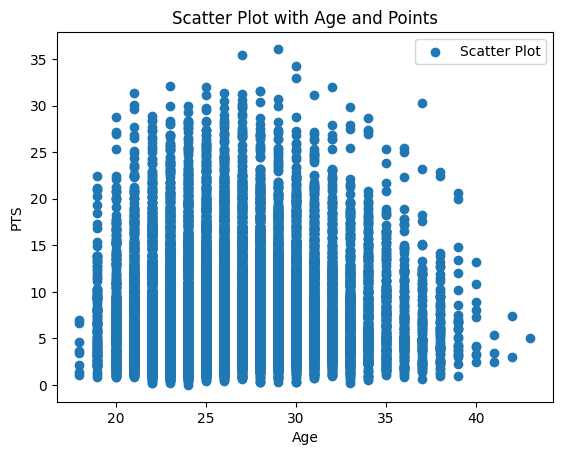

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm


# Scatter plot
plt.scatter(df['Age'], df['PTS'], label='Scatter Plot')
plt.title('Scatter Plot with Age and Points')
plt.xlabel('Age')
plt.ylabel('PTS')
plt.legend()
plt.show()



We can't really find a special relationship between age and points since we can see that the density approaches the normal distribution with higher points in the youngsters that those of age 35-43. I can imagine that the FG% has a close correlation with points scored.

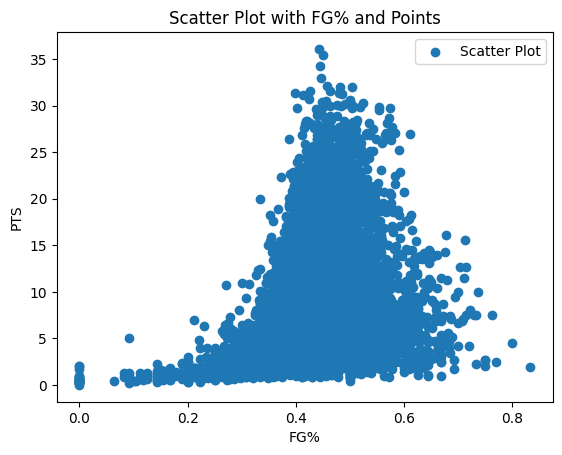

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Scatter plot
plt.scatter(df['FG%'], df['PTS'], label='Scatter Plot')
plt.title('Scatter Plot with FG% and Points')
plt.xlabel('FG%')
plt.ylabel('PTS')
plt.legend()
plt.show()

Again we see a normal approach(logarithmic until 55%) so this doesn't declare any special relation in between these attributes.Let's try to find out what happens with FG attempted and points.

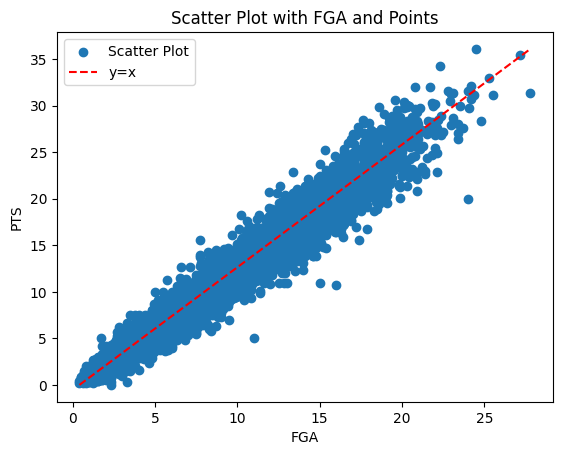

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Scatter plot
plt.scatter(df['FGA'], df['PTS'], label='Scatter Plot')

# Plot y=x line
plt.plot([min(df['FGA']), max(df['FGA'])], [min(df['PTS']), max(df['PTS'])], color='red', linestyle='--', label='y=x')

plt.title('Scatter Plot with FGA and Points')
plt.xlabel('FGA')
plt.ylabel('PTS')
plt.legend()
plt.show()


As we (finally!) supposed how many points scored is highly linear to the FG attempted. This proportional relathionship reflects our belief that as you try you will success. Additionally, I guessed that offensive and defensive rebounds have a strong connection, since they are both performed by Centers and not in th majority from players in many differents positions.

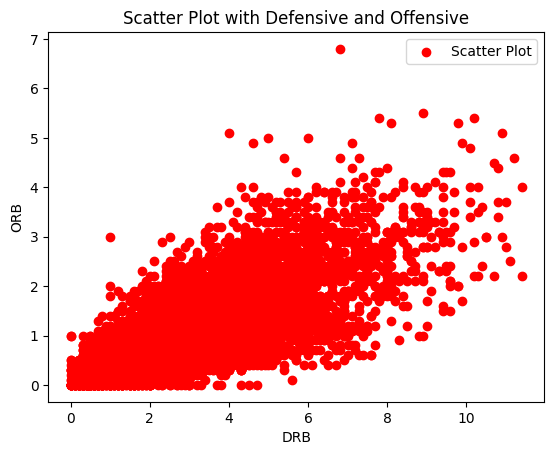

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Scatter plot
plt.scatter(df['DRB'], df['ORB'], label='Scatter Plot', color='r')
plt.title('Scatter Plot with Defensive and Offensive')
plt.xlabel('DRB')
plt.ylabel('ORB')
plt.legend()
plt.show()

Not so linear, but definetely they do match. Furthermore, I wanted to see if centers do lose a lot of free throws, so I make the diagramm for them.


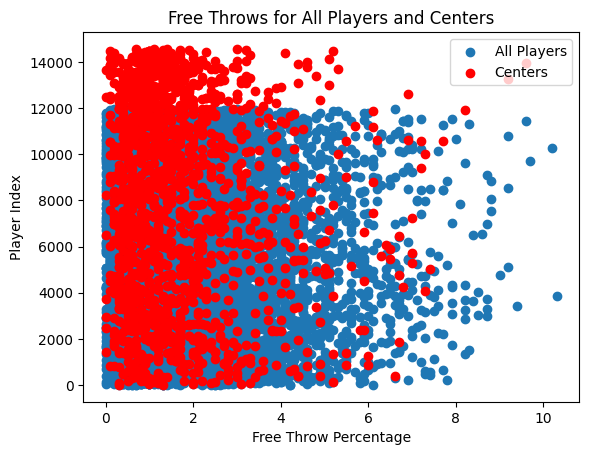

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Separate data for centers
centers_df = df[df['Pos'] == 'C']

# Scatter plot for all players
plt.scatter(df['FT'], range(len(df)), label='All Players')

# Scatter plot for centers
plt.scatter(centers_df['FT'], centers_df.index, color='red', label='Centers')

plt.title('Free Throws for All Players and Centers')
plt.xlabel('Free Throw Percentage')
plt.ylabel('Player Index')
plt.legend()
plt.show()


With repsect to other players, centers seem to have in majority 0-30% with only some to be over 50%. Lastly I would like to grasp which positions tend to score more points.

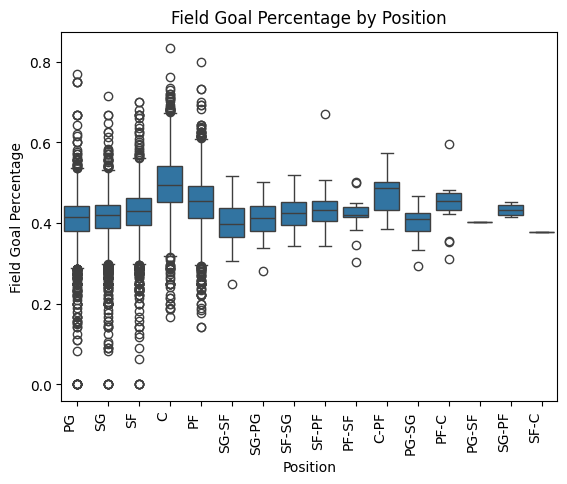

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Box plot for FG% by position
sns.boxplot(x='Pos', y='FG%', data=df)
plt.title('Field Goal Percentage by Position')
plt.xlabel('Position')
plt.ylabel('Field Goal Percentage')
plt.xticks(rotation=90, ha='right')
plt.show()


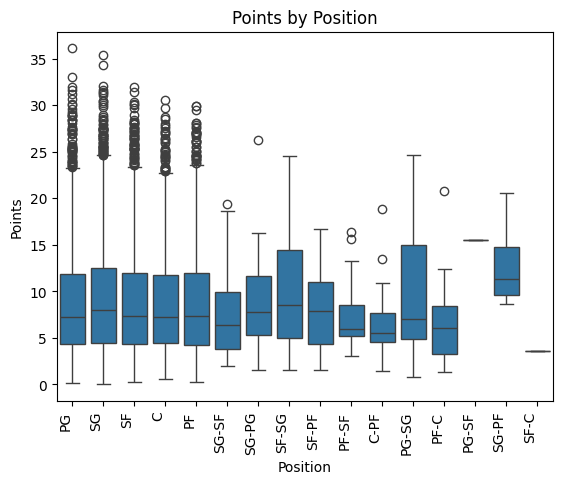

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Box plot for FG% by position
sns.boxplot(x='Pos', y='PTS', data=df)
plt.title('Points by Position')
plt.xlabel('Position')
plt.ylabel('Points')
plt.xticks(rotation=90, ha='right')
plt.show()

The guards tend to have more points but not significantly more than the other positions.The last thing before expressing you what I am going to modelize is how the total minutes played affects the total points someone scores. I expect a Linear correlation hence as you play more you are a good player so you score more! Let's see:


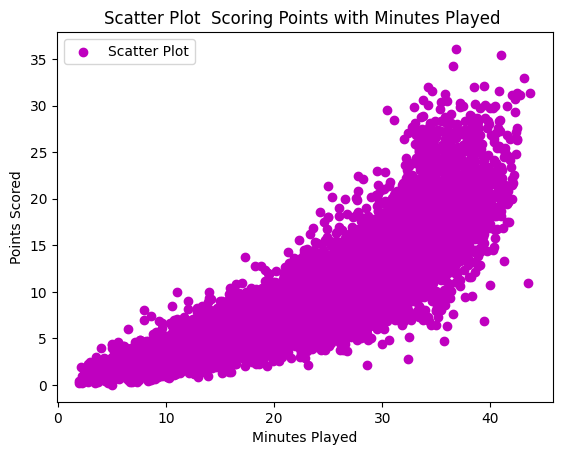

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Scatter plot
plt.scatter(df['MP'], df['PTS'], label='Scatter Plot', color='m')
plt.title('Scatter Plot  Scoring Points with Minutes Played ')
plt.xlabel('Minutes Played')
plt.ylabel('Points Scored')
plt.legend()
plt.show()

Not only our assumption was right but we can see that their function tends to be exponential. After analyzing and examining the data its time to try and predicted our target which I haven't really told you about. So, I am going to predict the points scored by using other attributes(or the ones with the biggest correlation). In this direction I would like to plot the correlation matrix, after dropping the names and year columns.

In [ ]:
df = df.drop(['Player', 'Year', 'Rk'], axis=1)



KeyError: "['Player', 'Year', 'Rk'] not found in axis"

Its time before we start finding the most important attributes, to map the positions to integers.


In [ ]:
df.value_counts('Pos')

Pos
SG       2773
PG       2695
SF       2404
PF       2300
C        1592
SF-SG      33
SG-SF      28
PG-SG      27
SG-PG      26
PF-SF      21
C-PF       20
SF-PF      20
PF-C       17
SG-PF       4
PG-SF       1
SF-C        1
dtype: int64

In [ ]:
valid_positions = ['PG', 'SG', 'SF', 'PF', 'C']

# Filter the DataFrame to keep only rows with valid positions
filtered_df = df[df['Pos'].isin(valid_positions)]

# Display the filtered DataFrame
print(filtered_df.value_counts('Pos'))

Pos
SG    2773
PG    2695
SF    2404
PF    2300
C     1592
dtype: int64


Given that there were a little percentage of the players who played in two different positions, instead of mapping them into integers I deleted them and create the filtered df.  

<ipython-input-56-6331b8be5ac3>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_values = filtered_df.corr()[column_to_analyze]


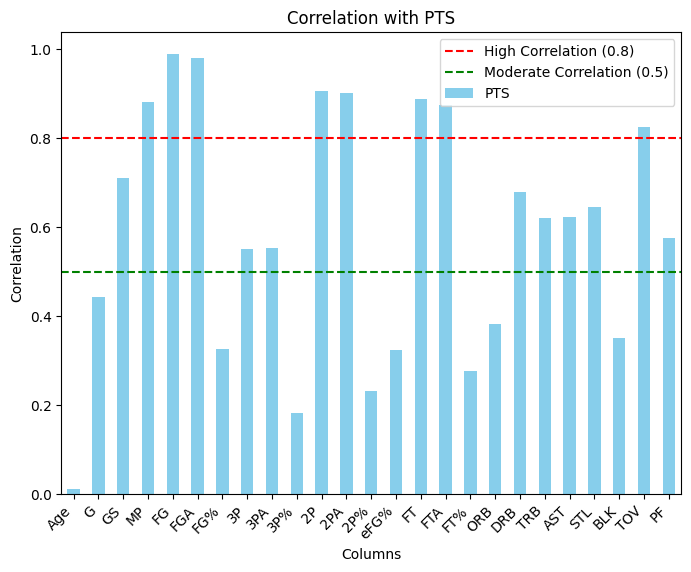

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Choose the column to analyze
column_to_analyze = 'PTS'

# Compute the correlation of the chosen column with other columns
correlation_values = filtered_df.corr()[column_to_analyze]

# Plot a bar chart
plt.figure(figsize=(8, 6))
correlation_values.drop(column_to_analyze).plot(kind='bar', color='skyblue')
plt.axhline(y=0.8, color='r', linestyle='--', label='High Correlation (0.8)')
plt.axhline(y=0.5, color='g', linestyle='--', label='Moderate Correlation (0.5)')
plt.title(f'Correlation with {column_to_analyze}')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()





In order not to overfit my model I am going only with the attributes higher than 0.8 correlation, with different models. Depending on the above plot, I have chosen games scored, minutes played, field goals, 2-pointers, 2-pointers attempted,turnovers and free throws, both successful and attempted.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
X = filtered_df[['GS', 'MP', 'FG', '2P', '2PA', 'FT', 'FTA', 'TOV']]
y = filtered_df['PTS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Random Forest
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

# XGBoost
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)
xgboost_predictions = xgboost_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Evaluate models using Mean Squared Error
print(f'Linear Regression MSE: {mean_squared_error(y_test, linear_predictions)}')
print(f'Decision Tree MSE: {mean_squared_error(y_test, tree_predictions)}')
print(f'Random Forest MSE: {mean_squared_error(y_test, forest_predictions)}')
print(f'XGBoost MSE: {mean_squared_error(y_test, xgboost_predictions)}')
print(f'KNN MSE: {mean_squared_error(y_test, knn_predictions)}')


Linear Regression MSE: 0.009266724644821091
Decision Tree MSE: 0.17837654058648533
Random Forest MSE: 0.05871521674458143
XGBoost MSE: 0.0460786961108848
KNN MSE: 1.6516929876753081


We can see that the lowest MSE is achieved by Linear Regression Model and the second best performance is Random Forest. Now we will see the results for the r2_score of these models.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Assuming 'filtered_df' is your DataFrame with features and target column
# Replace 'feature_columns' and 'target_column' with the actual column names

# Features and target variable
X = filtered_df[['GS', 'MP', 'FG', '2P', '2PA', 'FT', 'FTA', 'TOV']]
y = filtered_df['PTS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Random Forest
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

# XGBoost
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)
xgboost_predictions = xgboost_model.predict(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Evaluate models using R^2 Score
print(f'Linear Regression R^2 Score: {r2_score(y_test, linear_predictions)}')
print(f'Decision Tree R^2 Score: {r2_score(y_test, tree_predictions)}')
print(f'Random Forest R^2 Score: {r2_score(y_test, forest_predictions)}')
print(f'XGBoost R^2 Score: {r2_score(y_test, xgboost_predictions)}')
print(f'KNN R^2 Score: {r2_score(y_test, knn_predictions)}')


Linear Regression R^2 Score: 0.9997345569650219
Decision Tree R^2 Score: 0.9946976164692498
Random Forest R^2 Score: 0.9983329900134902
XGBoost R^2 Score: 0.998680087149202
KNN R^2 Score: 0.9526876629764119


The Mean Squared Error (MSE) and R^2 Score are both widely used metrics in the realm of regression analysis to evaluate the performance of predictive models. These metrics provide insights into the accuracy and effectiveness of a model's predictions.

The Mean Squared Error is a measure of the average squared difference between the predicted values and the actual values in a dataset. It is calculated by taking the sum of the squared differences between each predicted and actual value and dividing it by the number of observations. MSE is particularly useful because it penalizes larger errors more heavily than smaller ones. In an analytical sense, MSE quantifies the precision of a regression model by assessing how well it approximates the true underlying relationship in the data. Lower MSE values indicate that the model's predictions are closer to the actual values, suggesting a more accurate and precise model.

On the other hand, R^2 Score, or the coefficient of determination, assesses the proportion of the variance in the dependent variable that can be predicted from the independent variables. It is a scale-independent metric that ranges from 0 to 1, where 1 indicates a perfect fit. In an analytical context, R^2 Score provides insights into the explanatory power of a regression model. A high R^2 Score indicates that a large proportion of the variability in the target variable is explained by the model, while a lower R^2 Score suggests that the model is less effective at capturing the variance in the data. Analyzing both MSE and R^2 Score together provides a holistic understanding of a model's predictive capabilities and its ability to explain the observed variability in the data.

Testing the r2_score we can see great results for all the algorithms and I think its time to analyze more the metrics we used in order to predict our target value. Mathematically, the MSE is depicted by the following formula:
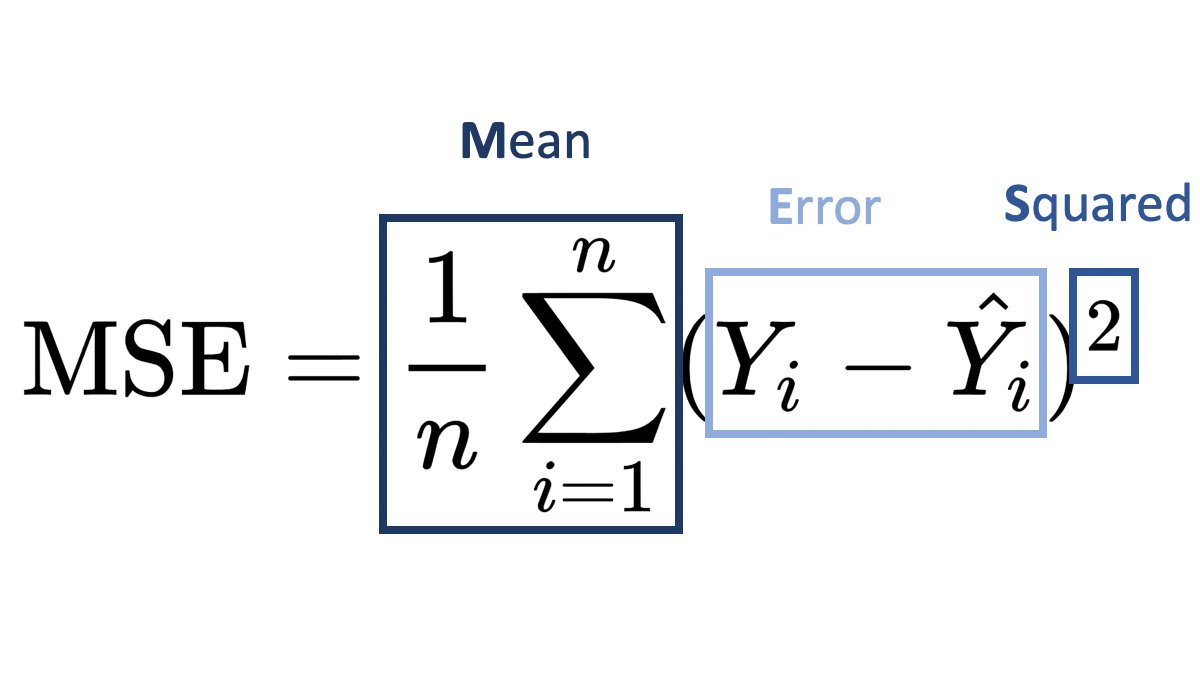
The link for the above photo is https://www.google.com/search?sca_esv=600789614&sxsrf=ACQVn08t7tVgXdpF_Dnc5gQTs64pHfRlVg:1706031213917&q=MSE&tbm=isch&source=lnms&sa=X&ved=2ahUKEwjsvezDhfSDAxVCcvEDHWrLA9oQ0pQJegQIDRAB&biw=1536&bih=730&dpr=1.25#imgrc=tKmWyebapTFgiM
As regarding to the r2_score the mathematical definition is: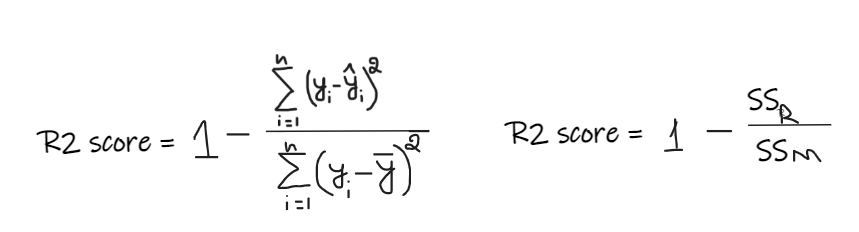
The link for the above photo is: https://www.google.com/search?q=r2_score+type&tbm=isch&ved=2ahUKEwj346ashvSDAxUkpP0HHUQkD-AQ2-cCegQIABAA&oq=r2_score+type&gs_lcp=CgNpbWcQAzoHCAAQgAQQEzoICAAQBxAeEBM6BggAEB4QEzoECAAQHjoHCAAQgAQQGFCXAljHC2CdDWgAcAB4AIABqAGIAacFkgEDMi40mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=SPmvZfefO6TI9u8PxMi8gA4&bih=730&biw=1536#imgrc=A1tIriuQyrGr1M



All in all, I hope I gave you a btter understanding of machine learning and a weird appilcation of it. This story provides both coding and data analysis part based on a fun to watch sport! Feel free to ask whatever you want!